In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [134]:
col = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv(r"C:\Freelance\Document\Magic Gamma.data", names=col)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [135]:
# Making class to int
df['class'] = (df['class'] == 'g').astype(int)

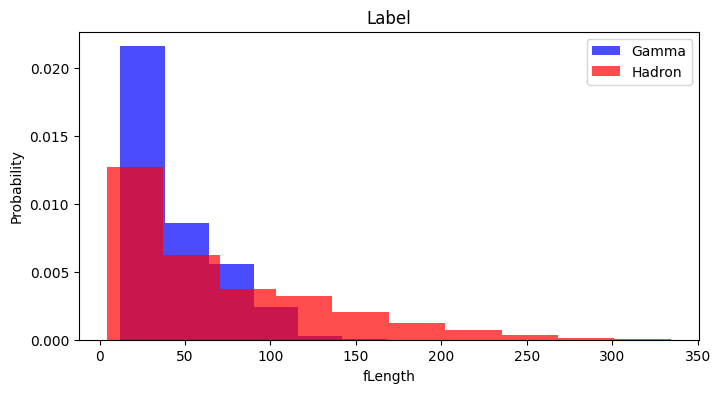

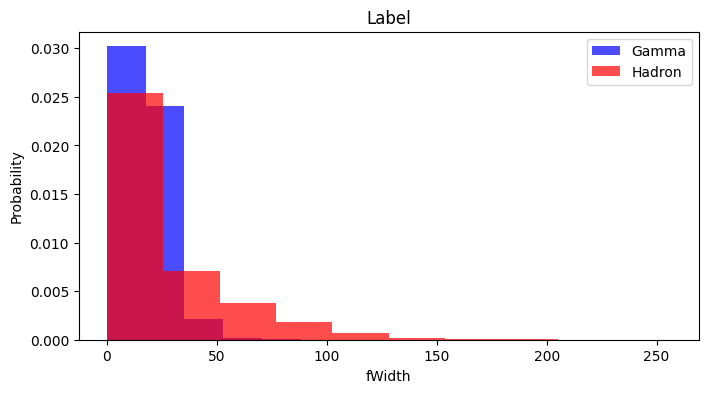

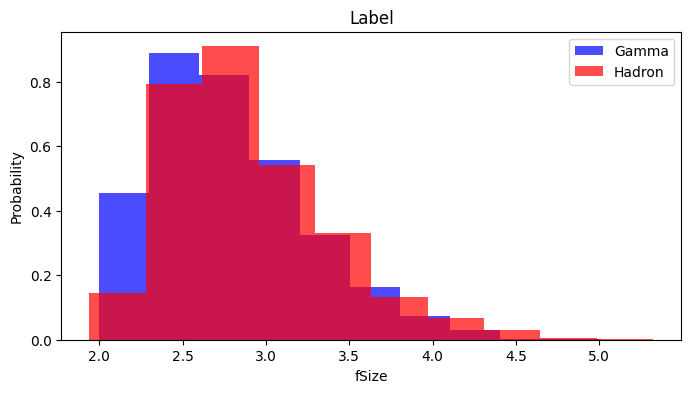

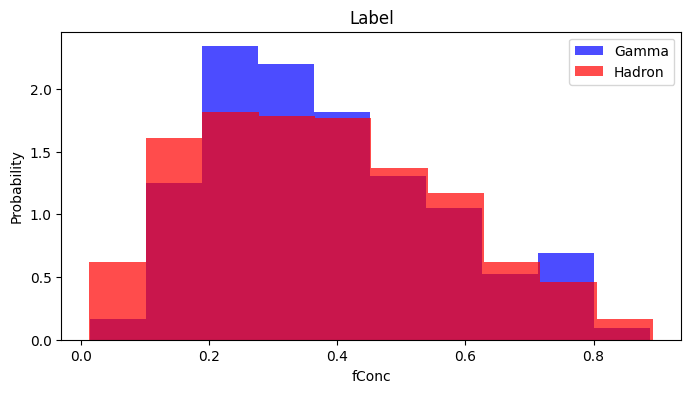

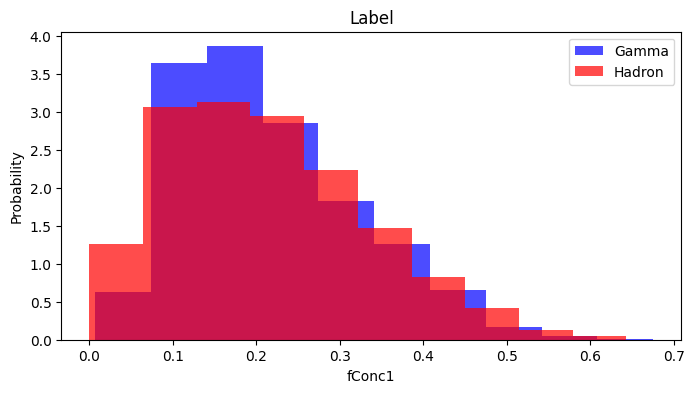

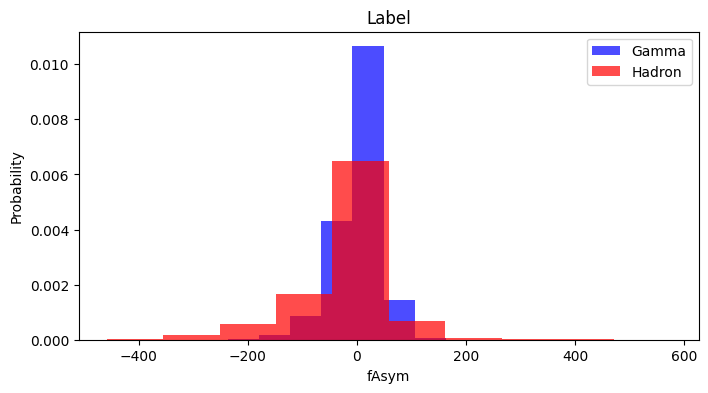

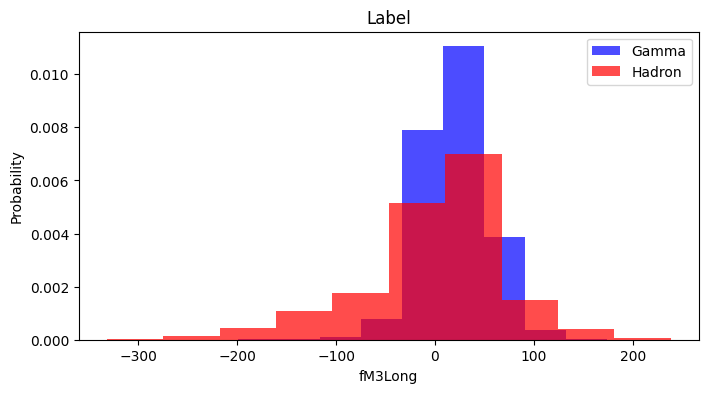

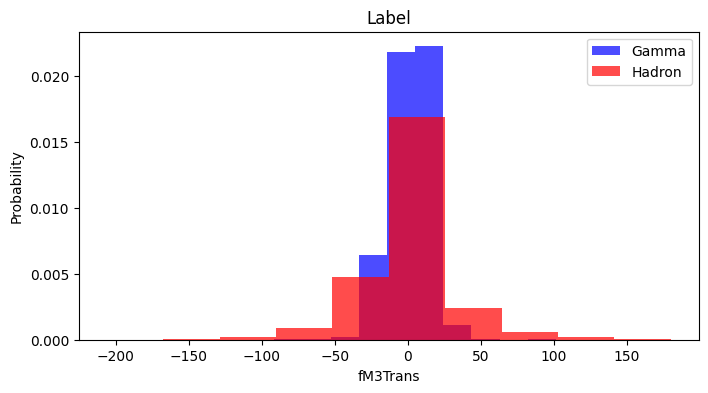

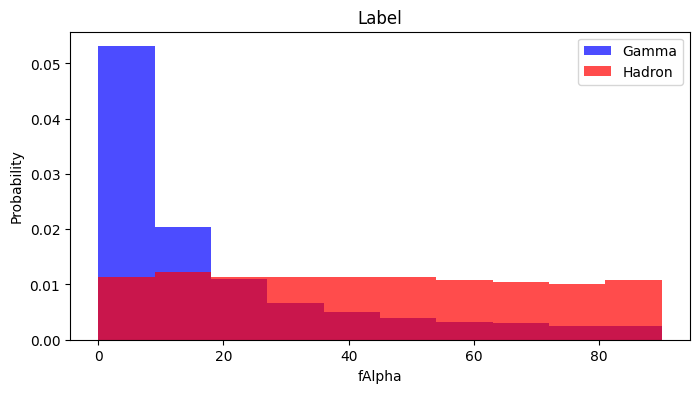

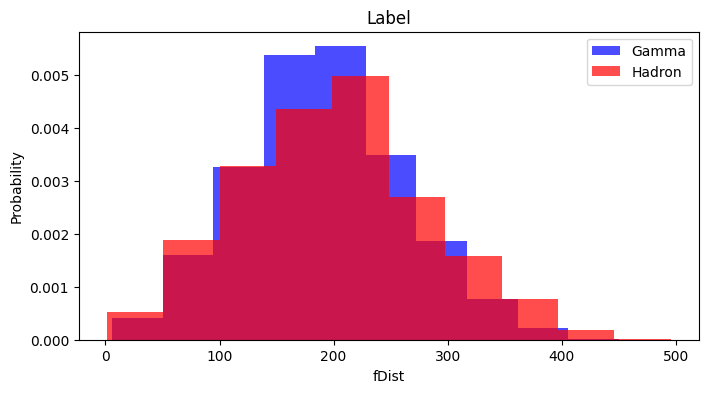

In [136]:
for label in df.columns[:-1]:
    plt.figure(figsize=(8,4))
    plt.hist(df[df["class"]==1] [label], color='blue', label='Gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0] [label], color='red', label='Hadron', alpha=0.7, density=True)
    plt.title("Label")
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [137]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler() 
    x = scaler.fit_transform(x)
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    return data, x , y

In [139]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [140]:
print(f'Hadron = {sum(y_train == 0)}')
print(f'Gamma  = {sum(y_train == 1)}')

Hadron = 7448
Gamma  = 7448


In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [142]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1369
           1       0.83      0.90      0.86      2435

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.79      3804
weighted avg       0.82      0.82      0.81      3804

